# Handwritten Digit Recognition using MNIST dataset and Julia Flux

Version: 1.00

- Version 1.00: Initial Notebook

### Readme

I did the "**Deep Learning with Flux**" course provided by **Julia Academy** (https://juliaacademy.com/courses/). I express my sincere gratitude to **Dr. Matt Bauman** for presenting this course and sharing the associated Jupyter Notebook. This notebook is associated with fourth lecture "**Recognizing handwriting with a neural network**" of the mentioned course.

As I was attending the lecture, I realized I need to code myself to understand and record my inferences and in the process came up with this working notebook. Intent here is to have this for my future reference as well as be useful to someone new to the field learning ML/DL.

This notebook implements a **neural network** using **Julia Flux** to **recognize handwritten digits** from **MNIST dataset**. 

Details of what this notebook covers is listed below:
- How to setup the Environment
- Where to get the datasets from 
- Which packages to install and how
- Understanding MNIST dataset
- Prepare input data
- Create output labels
- Use batch to improve efficiency and create training batch
- Define the model
- Train the model few times and observe improving loss value
- Show Loss automatically using callback
- Evaluate accuracy of prediction
- Update Model and improve accuracy

**Initial Model**
- **784 Inputs** -> **10 Outputs** with **Identity** Activation Function -> **Softmax**
- Loss Function = **Crossentropy**
- Optimizer Function = **ADAM**
- **Train** Accuracy = **96.36%**
- **Test** Accuracy = **89.88%**
- Total **Number of Parameters** of the Model = **7850**
<img src = "images/InitialModelTrainTest1.JPG">

**Updated Model**
- **784 Inputs** -> **20 hidden neurons** with **relu** as Activation Function) -> **10 Outputs** with **Identity** Activation Function -> **Softmax**
- Loss Function = **Crossentropy**
- Optimizer Function = **ADAM**
- **Train** Accuracy = **99.84%**
- **Test** Accuracy = **90.72%**
- Total **Number of Parameters** of the Model = **15910**
<img src = "images/UpdatedModelTrainTest1.JPG">

**Summary**
1. You can notice that the test loss is increasing after we added more complexity (more parameters) to the model i.e. it is overfitting => We need to **reduce the number of parameters or train with more samples**.
2. Our input is a 28x28 image, however, we are feeding it to the model as a vector which loses the spatial information of the one pixel to the other. And we did so because the the model topology (multi-layer perceptron) expects the input in a vetor form. Also we used the Dense function which connects every input to every output as needed for a multi-layer perceptron which probably could be adding more complexity than needed. We can alternatively go for a **model topology which retains the image structure** as a matrix for processing and connects few inputs to few outputs i.e. a Convolution Neural Network (CNN). 

### How to setup the Environment

I am using **Julia REPL** and **Jupyter Environment** for the notebook. If you wish to setup this environment, here is what I did:
- I installed Julia 1.3.1 from: https://julialang.org/downloads/
- Once I installed Julia, I invoked Jupyter Environment from the REPL using following:
    - julia> using IJulia
    - julia> notebook(detached=true)     
- I created a New Notebook (File->New Notebook... select Julia) ... which is this notebook and started editing.

### Where to get the datasets from

We will be using MNIST dataset which comes along with Julia. 

### Which packages to install and how

I added the packages I did not have on my system - so that can use them during the course - by using following code at the REPL
- **Flux**
    - is the deep learning package from Julia - helps create/train/use models
    - julia> using Pkg
    - julia> Pkg.add("Flux")
- **Plots**
    - helps create graphs for visualization as you build & refine your model
    - julia> using Pkg
    - julia> Pkg.add("Plots")
- **Images**
    - helps work with images
    - julia> using Pkg
    - julia> Pkg.add("Images")
- **Printf**
    - helps print data onto the terminal
    - julia> using Pkg
    - julia> Pkg.add("Printf")

### Understanding MNIST dataset

We have **60000** **grey scale** images of handwritten digits, with **784 pixels** stored as **28x28 matrices** and **60000 labels** defining the corresponding digits having values in the range of **0 to 9**.  

In [1]:
using Flux

┌ Warning: CuArrays.jl only supports CUDNN v7.6 or higher
└ @ CuArrays C:\Users\Chinmoy\.julia\packages\CuArrays\HE8G6\src\CuArrays.jl:121


In [2]:
using Flux.Data.MNIST

In [3]:
using Images

In [4]:
images = MNIST.images();

In [5]:
labels = MNIST.labels();

In [6]:
typeof(images)

Array{Array{Gray{Normed{UInt8,8}},2},1}

In [7]:
# Note: 2 denotes the image is a matrix
typeof(images[1])

Array{Gray{Normed{UInt8,8}},2}

In [8]:
size(images)

(60000,)

In [9]:
size(images[1])

(28, 28)

In [10]:
length(images[1])

784

In [11]:
typeof(labels)

Array{Int64,1}

In [12]:
size(labels)

(60000,)

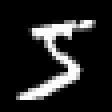

In [13]:
images[1]

In [14]:
labels[1]

5

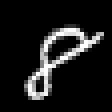

In [15]:
images[60000]

In [16]:
labels[60000]

8

We get the numeric content of the images using Float64 as broadcast on each image matrix.

In [17]:
Float64.(images[1])

28×28 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0       0.0       …  0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0       …  0.498039  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.25098   0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0       …  0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0  0.0  0.0  0.0
 ⋮                         

Check if all the images are of same size (784 pixels).

In [18]:
# gives unique elements in the array
unique([1,2,4,2])

3-element Array{Int64,1}:
 1
 2
 4

In [19]:
# gives we have 60000 images
length(images)

60000

In [20]:
# length when broadcasted on each of the 60000 images, gives a 60000 array... each element corresponding to the length of 
# the corresponding image
length.(images);

In [21]:
# using unique on top of above gives the unique values of length seen
# what is the siginificance of using []... if you do not use, the result is an 1-element array instead of a number.
n_inputs = unique(length.(images))[]

784

Check all the labels have values in the range of 0 to 9 i.e. total unique values = 10.

In [22]:
unique(labels)

10-element Array{Int64,1}:
 5
 0
 4
 1
 9
 2
 3
 6
 7
 8

In [23]:
n_outputs = length(unique(labels))

10

### Prepare input data

- Our neural network (here a multi-layer perceptron) accepts a vector. Our images are in the matrix form (28x28). Also the values of the images are in grey scale. We need to have them in numeric form (Float64) for the neural network to work effectively on it. We will define a custom function that will do the job for us.
- We will convert few of the images of the total 60000, which will be used for model training. This helps keep the rest images unseen by the model and hence can be used for validation to see how good the model is doing for an unknown input. 
- Each input data will be **784 element vector**.

In [24]:
# Float64 broadcast converts each grey scale pixel value to Float64
# vec function converts the matrix form of the data to vector form
vec(Float64.(images[1]))

784-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮  
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [25]:
preprocess(img) = vec(Float64.(img))

preprocess (generic function with 1 method)

In [26]:
# broadcast preprocess to convert each image in the images[1:5000]
xs = preprocess.(images[1:5000])

5000-element Array{Array{Float64,1},1}:
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0

In [27]:
size(xs)

(5000,)

In [28]:
size(xs[1])

(784,)

### Create output labels

We will use one hot encoding to generate the output labels as each of them will correspond to a probabaility of they corresponding to a digit value between 0 to 9. Each output label will be as **10 element vector**.

In [29]:
ys = [Flux.onehot(labels, 0:9) for labels in labels[1:5000]]

5000-element Array{Flux.OneHotVector,1}:
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
 ⋮                             
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [30]:
size(ys)

(5000,)

In [31]:
size(ys[1])

(10,)

### Use batch to improve efficiency and create training batch

Remember batch converts the data to matrices form which is very suitable for operations on GPU and hence are faster in execution => improves efficiency. We will define a custom function to create a batch for a given range and use it create training batch.

- **Input Data**: Batch converts the 5000 number of 784 element vectors to **784x5000 matrix** : each column corresponds to an instance
- **Output Labels**: Batch converts the 5000 number of 10 element labels to **10x5000 matrix** : each column corresponds to an instance


In [32]:
function create_batch(r)
    xs = [preprocess(img) for img in images[r]]
    ys = [Flux.onehot(labels, 0:9) for labels in labels[r]]
    return (Flux.batch(xs), Flux.batch(ys))
end

create_batch (generic function with 1 method)

In [33]:
trainbatch = create_batch(1:5000)

([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], Bool[0 1 … 0 0; 0 0 … 1 0; … ; 0 0 … 0 0; 0 0 … 0 0])

In [34]:
typeof(trainbatch)

Tuple{Array{Float64,2},Flux.OneHotMatrix{Array{Flux.OneHotVector,1}}}

In [35]:
trainbatch[1]

784×5000 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0

In [36]:
trainbatch[2]

10×5000 Flux.OneHotMatrix{Array{Flux.OneHotVector,1}}:
 0  1  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  1  0  0  0  0  0
 0  0  0  1  0  0  1  0  1  0  0  0  0     0  0  0  0  0  1  0  0  0  0  1  0
 0  0  0  0  0  1  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  1  0  1
 0  0  0  0  0  0  0  1  0  0  1  0  1     1  0  0  0  0  0  0  0  1  0  0  0
 0  0  1  0  0  0  0  0  0  1  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0  0  1  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  1  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  1  0  0  0  1  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  1  0  0  0  0  0  0  0
 0  0  0  0  1  0  0  0  0  0  0  0  0     0  1  0  0  0  0  0  0  0  0  0  0

### Define the model

Let us start with a 784 inputs layer, followed by a 10 outputs layer with the identity as the activation function, followed by a softmax layer to arrive at the probabilities (softmax ensures that the sum of the outputs from it total to 1).

In [89]:
model = Chain(Dense(n_inputs, n_outputs, identity), softmax)

Chain(Dense(784, 10), softmax)

As we are working with probabilities, we will use crossentropy as the loss function (this kind of informs the model that the expected values are in the range of 0 to 1).

In [90]:
loss(x,y) = Flux.crossentropy(model(x),y)

loss (generic function with 1 method)

Define ADAM as the optimizer.

In [91]:
opt = ADAM()

ADAM(0.001, (0.9, 0.999), IdDict{Any,Any}())

### Train the model few times and observe improving loss value

Train the model few times and observe the loss improving. The loss value gives us an understanding on how well the model is doing on the prediction.

In [92]:
# why do we need to put the trainbatch inside [] and not use as is ?
@time Flux.train!(loss, params(model), [trainbatch], opt)
@time Flux.train!(loss, params(model), [trainbatch], opt)

  1.379892 seconds (20.30 M allocations: 406.186 MiB, 3.57% gc time)
  0.970641 seconds (19.75 M allocations: 379.569 MiB, 6.84% gc time)


In [93]:
loss(trainbatch...)

2.299392f0

In [94]:
@time Flux.train!(loss, params(model), [trainbatch], opt)

  0.998636 seconds (19.75 M allocations: 379.569 MiB, 6.97% gc time)


In [95]:
loss(trainbatch...)

2.2460005f0

To train multiple times, we will use the Iterators.repeated. This does not copy the data multiple times (does not waste memory space), rather it creates an object which loops over the same data multiple times.

In [96]:
Iterators.repeated(trainbatch,100)

Base.Iterators.Take{Base.Iterators.Repeated{Tuple{Array{Float64,2},Flux.OneHotMatrix{Array{Flux.OneHotVector,1}}}}}(Base.Iterators.Repeated{Tuple{Array{Float64,2},Flux.OneHotMatrix{Array{Flux.OneHotVector,1}}}}(([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], Bool[0 1 … 0 0; 0 0 … 1 0; … ; 0 0 … 0 0; 0 0 … 0 0])), 100)

### Show Loss automatically using callback

Above we checked the loss value manually after each train cycle. We will use the callback function supported by flux to call a specific function we would want to run after every train step. 

In [97]:
# define the function we want Flux to call
callback() = @show (loss(trainbatch...))

callback (generic function with 1 method)

In [98]:
@time Flux.train!(loss, params(model), Iterators.repeated(trainbatch,4), opt; cb = callback)

loss(trainbatch...) = 2.1945474f0
loss(trainbatch...) = 2.1448946f0
loss(trainbatch...) = 2.0969093f0
loss(trainbatch...) = 2.050464f0
  3.911752 seconds (79.36 M allocations: 1.562 GiB, 6.24% gc time)


We would generally train the model for much higher number of times... and we would not want the loss value to be seen at every train step plus it is computationally intensive too to do at every train step. We can make us of the throttle function that would define the number of seconds to wait between calling two successive callback calls.

In [99]:
@time Flux.train!(loss, params(model), Iterators.repeated(trainbatch,40), opt; cb = Flux.throttle(callback,10))

loss(trainbatch...) = 2.0054407f0
loss(trainbatch...) = 1.5202025f0
loss(trainbatch...) = 1.1933346f0
loss(trainbatch...) = 0.98272187f0
 37.204003 seconds (790.38 M allocations: 14.906 GiB, 6.74% gc time)


### Check train and test loss

Train data is the data that the model sees when it is getting trained. Test data is the data that the model does not see - it is the data that is used to test how good the current trained model is doing.

In [100]:
# we will use the next 5000 instances for the test data
testbatch = create_batch(5001:10000)

([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], Bool[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 1 0])

Let us write a custom function that will show the train and test loss as the model is getting trained.

In [101]:
using Printf

In [102]:
loss(trainbatch...)

0.98272187f0

In [103]:
train_loss = Float64[]
test_loss = Float64[]
# bang ! denotes you are updating the current data structure
function update_loss!()
    push!(train_loss, loss(trainbatch...))
    push!(test_loss, loss(testbatch...))
    # using "end" to print the latest loss value that was pushed in
    @printf("train loss = %.2f, test loss = %.2f \n", train_loss[end], test_loss[end])
end

update_loss! (generic function with 1 method)

In [104]:
@time Flux.train!(loss, params(model), Iterators.repeated(trainbatch,1000), opt; cb = Flux.throttle(update_loss!,60)) |>gpu

train loss = 0.97, test loss = 1.00 
train loss = 0.56, test loss = 0.61 
train loss = 0.43, test loss = 0.50 
train loss = 0.37, test loss = 0.44 
train loss = 0.32, test loss = 0.41 
train loss = 0.29, test loss = 0.39 
train loss = 0.27, test loss = 0.38 
train loss = 0.25, test loss = 0.37 
train loss = 0.23, test loss = 0.36 
train loss = 0.22, test loss = 0.36 
train loss = 0.21, test loss = 0.36 
train loss = 0.20, test loss = 0.35 
train loss = 0.19, test loss = 0.35 
train loss = 0.18, test loss = 0.35 
864.882100 seconds (19.75 G allocations: 371.125 GiB, 7.13% gc time)


Notice following:
- loss values improve as the training progresses
- test loss > train loss (as the test data is new data for model which it has not seen) 

Let us plot the train and test loss graphs. Notice the following:
- both the losses reduce as the number of seconds (training) increase. 
- there is a gap in the in the train and test loss towards the end - need to further investigate ways to reduce this gaps.

In [105]:
using Plots

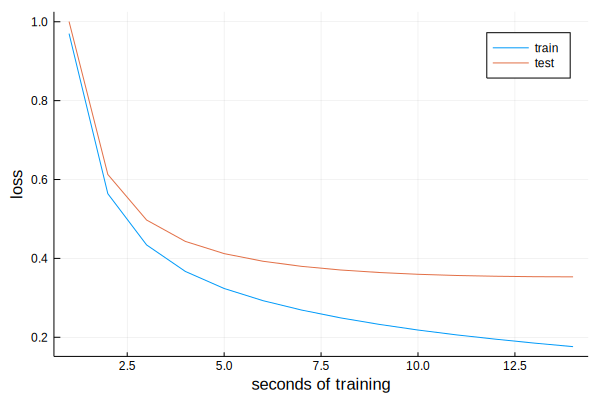

In [106]:
plot(1:length(train_loss), train_loss, label = "train")
plot!(1:length(test_loss), test_loss, label = "test")
plot!(xlabel = "seconds of training", ylabel = "loss")

### Evaluate accuracy of prediction

Check the prediction for couple of images. 

5001 image - labelled as 7, model detects as 7 with highest probability. The next highest probability is for digit 2. Notice, if there is a loop at the bottom, the 7 will look like a 2. 

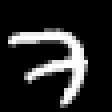

(7, (0.82491916f0, 7))

In [107]:
i = 5001
display(images[i])
# findmax returns the max value of the iteration followed by the index
# you can get the max value and index of max value separately using [1] and [2] after the expression
# here the index value of 1 corresponds to digit 0 ... index value of 10 corresponds to 9
# hence, we need to subtract 1 from the returned index value to get the predicted digit
# as the expression returns both max value and index of max value... subtraction needs to be done on both
# hence, we broadcast (.) subtraction over both... where in the max value is subtracted by 0, index by 1, hence .-(0,1)
labels[i], findmax(model(preprocess(images[i]))) .- (0,1)

In [108]:
model(preprocess(images[i]))

10-element Array{Float32,1}:
 1.47012215e-5 
 1.3659076e-5  
 0.15183854    
 0.01979705    
 0.000104114784
 2.3618115e-6  
 1.1035284e-5  
 0.82491916    
 0.0013060396  
 0.0019933602  

5002 image - labelled as 3, model detects as 3 with the highest probability. 

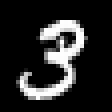

(3, (0.9965526f0, 3))

In [109]:
i = 5002
display(images[i])
labels[i], findmax(model(preprocess(images[i]))) .- (0,1)

In [110]:
model(preprocess(images[i]))

10-element Array{Float32,1}:
 1.0651071e-5 
 7.117327e-7  
 5.5700795e-5 
 0.9965526    
 2.8131538e-8 
 4.370113e-5  
 4.869005e-9  
 6.533285e-6  
 0.002962886  
 0.00036723318

5003 image - labelled as 4, model detects as 9 with a highest probability. Observe, next highest probability is for 4. Notice, if there is a small loop at the top, the 4 in the image will become a 9 - this is what the model got confused with and detected the 4 incorretly as 9. 

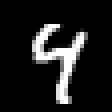

(4, (0.86017096f0, 9))

In [111]:
i = 5003
display(images[i])
labels[i], findmax(model(preprocess(images[i]))) .- (0,1)

In [112]:
model(preprocess(images[i]))

10-element Array{Float32,1}:
 3.0339202e-6
 2.8136736e-7
 5.317315e-7 
 0.0026459738
 0.08925709  
 0.0101921335
 3.6720678e-5
 0.0058719506
 0.031821303 
 0.86017096  

Let us calculate accuracy of prediction i.e. how much percentae of images(digits) got predicted correctly. We will do this both train and test images to get train accuracy and test accuracy.

In [113]:
# prediction custom function returns the predicted digit
# for the findmax we need to subtract 1 from the returned index at [2] location to get the predicted digit
prediction(i) = findmax(model(preprocess(images[i])))[2] - 1

prediction (generic function with 1 method)

In [114]:
# expression returns 1 if prediction and ground truth labels are equal or 0
# sum of above ... divided by total number of instance ... gives the how many instances got predicted accurately
prediction_correct(r,n) = ((sum(labels[i] == prediction(i) for i in r)) / n) * 100

prediction_correct (generic function with 2 methods)

In [115]:
train_accuracy = prediction_correct(1:5000,5000)

96.36

In [116]:
test_accuracy = prediction_correct(5001:10000,5000)

89.88000000000001

In [65]:
### Update Model and improve accuracy

Add 20 hidden neurons to the model to handle more complexity. Use relu (zero for <0; identity for >=0) as the activation function.

In [117]:
n_hidden = 20
model = Chain(Dense(n_inputs, n_hidden, relu),
              Dense(n_hidden, n_outputs, identity),
              softmax)

Chain(Dense(784, 20, relu), Dense(20, 10), softmax)

Reset the arrays holding the loss values to populate with new data from the updated model.

In [118]:
# reset the train and test loss arrays to populate it with data from the updated model
train_loss = Float64[]
test_loss = Float64[]

0-element Array{Float64,1}

In [119]:
@time Flux.train!(loss, params(model), Iterators.repeated(trainbatch,1000), opt; cb = Flux.throttle(update_loss!, 60)) |> gpu

train loss = 2.29, test loss = 2.29 
train loss = 0.57, test loss = 0.62 
train loss = 0.33, test loss = 0.41 
train loss = 0.24, test loss = 0.36 
train loss = 0.18, test loss = 0.33 
train loss = 0.15, test loss = 0.32 
train loss = 0.12, test loss = 0.32 
train loss = 0.10, test loss = 0.32 
train loss = 0.08, test loss = 0.32 
train loss = 0.07, test loss = 0.33 
train loss = 0.05, test loss = 0.33 
train loss = 0.04, test loss = 0.34 
train loss = 0.04, test loss = 0.35 
train loss = 0.03, test loss = 0.36 
train loss = 0.03, test loss = 0.36 
896.142363 seconds (19.75 G allocations: 373.119 GiB, 7.19% gc time)


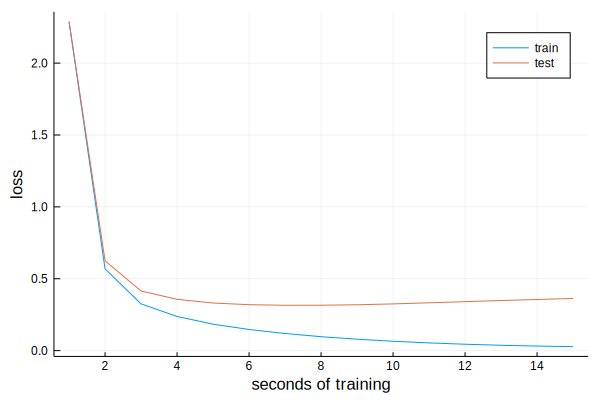

In [120]:
plot(1:length(train_loss), train_loss, label = "train")
plot!(1:length(test_loss), test_loss, label = "test")
plot!(xlabel = "seconds of training", ylabel = "loss")

In [121]:
train_accuracy = prediction_correct(1:5000,5000)

99.83999999999999

In [122]:
test_accuracy = prediction_correct(5001:10000,5000)

90.72

Notice that the train loss is quite small towards the end. However, the test loss increases after certain point (you can see that in the loss values as well as in the plots).

**Updated Model - Total number of parameters = 15910**
- 784 inputs * 20 hidden neuron = 15680 weights
- 20 biases for the 20 hidden neurons
- 20 hidden neuron * 10 outputs = 200 weights
- 10 biases for the 10 outputs
- 15680 + 20 + 200 + 10 = 15910

**Initial Model - Total number of parameters = 7850**
- 784 inputs * 10 outputs = 7840 weights
- 10 biases for the 10 outputs
- 7840 + 10 = 7850

**Summary**
1. You can notice that the test loss is increasing after we added more complexity (more parameters) to the model i.e. it is overfitting  => We need to reduce the number of parameters or train with more samples.
2. Our input is a 28x28 image, however, we are feeding it to the model as a vector which loses the spatial information of the one pixel to the other. And we did so because the the model topology (multi-layer perceptron) expects the input in a vetor form. Also we used the Dense function which connects every input to every output as needed for a multi-layer perceptron which probably could be adding more complexity than needed. We can alternatively go for a model topology which retains the image structure as a matrix for processing and connects few inputs to few outputs i.e. a Convolution Neural Network (CNN). 